In [1]:
%matplotlib inline
import os
import numpy as np
from matplotlib import pyplot as plt
from scipy import io as sio
plt.rcParams.update({'font.size': 12})

work_dir = os.path.expanduser('~/Papers/2023-Yang-Tropo/notebooks/demo_tex_corr')
os.chdir(work_dir)
print('Go to directory:', work_dir)

Go to directory: /Users/yunjunz/Papers/2023-Yang-Tropo/notebooks/demo_tex_corr


In [2]:
def normalize(data, ex_perc=0.1):
    # choose the 99.9% percentile as min/max
    # to avoid the impact of outliers
    dmin = np.percentile(data, ex_perc/2)
    dmax = np.percentile(data, 100 - ex_perc/2)
    norm_data = (data - dmin) / (dmax - dmin)
    # set out-of-range data to the boundary values
    norm_data[norm_data<0] = 0
    norm_data[norm_data>1] = 1
    return norm_data

In [3]:
topo  = sio.loadmat('fig_a.mat')['fig_a']
tropo = sio.loadmat('fig_b.mat')['fig_b']
defo  = sio.loadmat('fig_c.mat')['fig_c']
topo_h  = sio.loadmat('fig_d.mat')['fig_d']
tropo_h = sio.loadmat('fig_e.mat')['fig_e']
defo_h  = sio.loadmat('fig_f.mat')['fig_f']

save figure to file ../pic/demo_tex_corr_RdYlBu_r.png


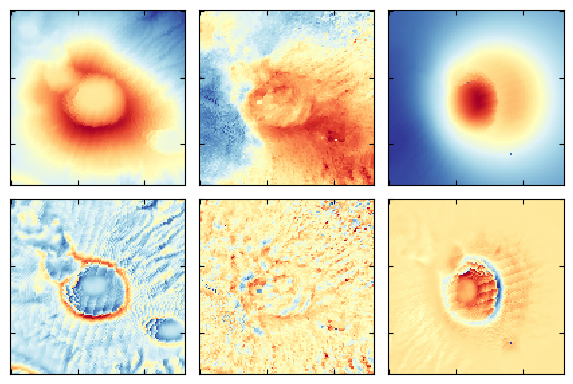

In [4]:
cmap = 'RdBu_r'
#cmap = 'Greys_r'
cmap = 'RdYlBu_r'

fig, axs = plt.subplots(nrows=2, ncols=3, figsize=[6, 4], sharex=True, sharey=True)
for ax, data in zip(axs.flatten(), [topo, tropo, defo, topo_h, tropo_h, defo_h]):
    ax.imshow(normalize(data, 0.1), interpolation='nearest', cmap=cmap)

# axis format
for ax in axs.flatten():
    ax.tick_params(which='both', direction='in', labelsize=12, bottom=True, top=True, left=True, right=True)
    ax.set_xticklabels([])
    ax.set_yticklabels([])
fig.tight_layout(h_pad=1, w_pad=0.2)

# output
out_fig = f'../pic/demo_tex_corr_{cmap}.png'
print('save figure to file', out_fig)
plt.savefig(out_fig, bbox_inches='tight', transparent=True, dpi=600)
plt.show()